In [ ]:
#import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#load datasets
data_loan_train=pd.read_csv("C:/Users/Anwesha Mishra/Downloads/Loan_data/Loan_data/train_v2.csv/train_v2.csv")
data_loan_test=pd.read_csv("C:/Users/Anwesha Mishra/Downloads/Loan_data/Loan_data/test_v2.csv/test_v2.csv")

C:\Users\Anwesha Mishra\AppData\Local\Temp\ipykernel_31108\3249914595.py:2: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  data_loan_train=pd.read_csv("C:/Users/Anwesha Mishra/Downloads/Loan_data/Loan_data/train_v2.csv/train_v2.csv")
C:\Users\Anwesha Mishra\AppData\Local\Temp\ipykernel_31108\3249914595.py:3: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  data_loan_test=pd.read_csv("C:/Users/Anwesha Mishra/Downloads/Loan_data/Loan_data/test_v2.csv/test_v2.csv")


In [ ]:
#f776=loan or not, #f777=fraud or not (the loan can be fraud), these numbers are a result of machine learning technique in order to protect financial information of customers

data_loan_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [ ]:
data_loan_test.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,...,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,...,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,...,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,...,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23


In [ ]:
#check for missing values
data_loan_train.isnull().sum()

id         0
f1         0
f2         0
f3         0
f4         0
        ... 
f775    1525
f776       0
f777       0
f778       0
loss       0
Length: 771, dtype: int64

In [ ]:
data_loan_test.isnull().sum()

id         0
f1         0
f2         0
f3         0
f4         0
        ... 
f774    2066
f775    2960
f776       0
f777       0
f778       0
Length: 770, dtype: int64

In [ ]:
#drop missing values
data_loan_tr=data_loan_train.dropna()
data_loan_te=data_loan_test.dropna()

In [ ]:
data_loan_tr.isnull().sum()

id      0
f1      0
f2      0
f3      0
f4      0
       ..
f775    0
f776    0
f777    0
f778    0
loss    0
Length: 771, dtype: int64

In [ ]:
data_loan_te.isnull().sum()

id      0
f1      0
f2      0
f3      0
f4      0
       ..
f774    0
f775    0
f776    0
f777    0
f778    0
Length: 770, dtype: int64

Text(0.5, 1.0, 'Histogram Showing Loss Distribution')

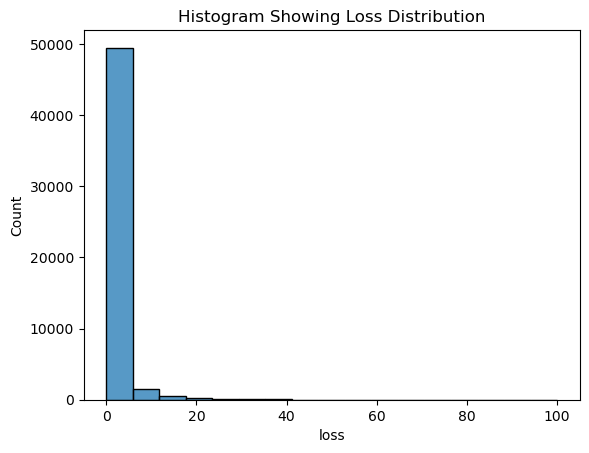

In [ ]:
sns.histplot(data_loan_tr['loss'])
plt.title('Histogram Showing Loss Distribution')

In [ ]:
number = data_loan_tr.f777.value_counts()
legal = number[0]
fraud = number[1]
legal_perc = (legal/(legal+fraud))*100
fraud_perc = (fraud/(legal+fraud))*100
print("There were {} legal transactions ({:.2f}%) and {} fraud transactions ({:.2f}%).".format(legal, legal_perc, fraud, fraud_perc))

There were 37924 legal transactions (73.02%) and 14016 fraud transactions (26.98%).


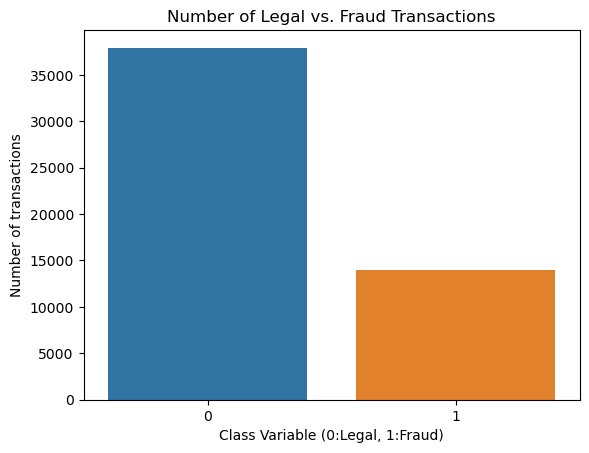

In [ ]:
sns.barplot(x=number.index, y=number)
plt.title("Number of Legal vs. Fraud Transactions")
plt.ylabel("Number of transactions")
plt.xlabel("Class Variable (0:Legal, 1:Fraud)")
plt.show()

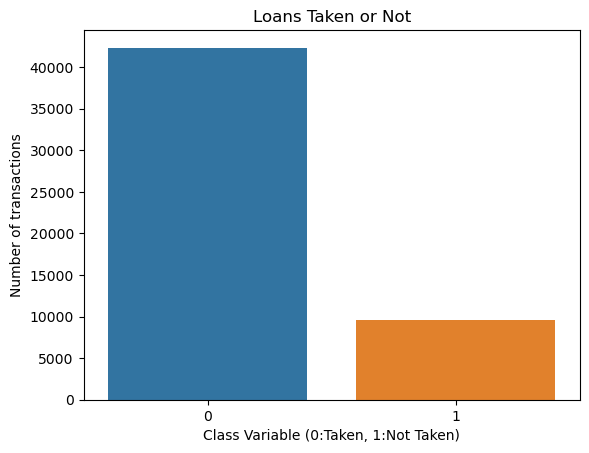

In [ ]:
#there are more fraud cases where loans are taken
number_loan = data_loan_tr.f776.value_counts()
sns.barplot(x=number_loan.index, y=number_loan)
plt.title("Loans Taken or Not")
plt.ylabel("Number of transactions")
plt.xlabel("Class Variable (0:Taken, 1:Not Taken)")
plt.show()

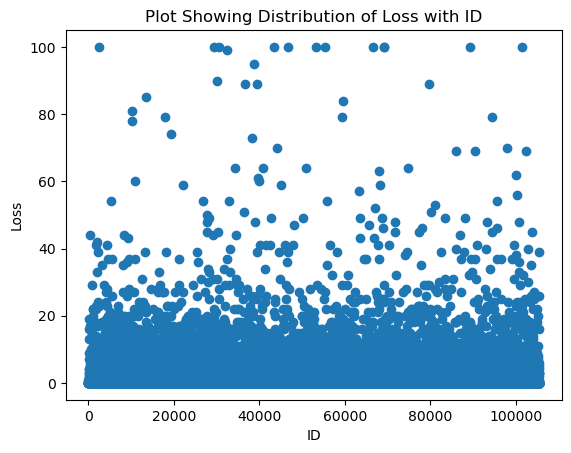

In [ ]:
plt.scatter(data_loan_tr['id'], data_loan_tr['loss'])
plt.xlabel('ID')
plt.ylabel('Loss')
plt.title('Plot Showing Distribution of Loss with ID')
plt.show()

In [ ]:
#train and test shapes
print("Train Number: " + str(data_loan_tr.shape) + " \nTest Number: " + str(data_loan_te.shape))
data_loan_tr.reset_index(drop=True, inplace=True)
data_loan_te.reset_index(drop=True, inplace=True)

Train Number: (51940, 771) 
Test Number: (54767, 770)


In [ ]:
#calculate total fraud values
fraud_in_train = data_loan_tr.f777.value_counts()[1]
print("There are " + str(fraud_in_train) + " fraud transactions in train data.")


There are 14016 fraud transactions in train data.


In [ ]:
data_loan_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51940 entries, 0 to 51939
Columns: 771 entries, id to loss
dtypes: float64(653), int64(99), object(19)
memory usage: 305.5+ MB


In [ ]:
data_loan_tr.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,...,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000,51940.000000
mean,53865.652099,133.783385,8.100231,0.498406,2575.531382,7.547189,46628.654332,3116.184521,2647.083924,133.664962,...,23.651251,8.128500,-5.983063,4.627921,0.259028,0.183454,0.185175,0.269850,183.692145,0.824336
std,30563.110631,14.251180,1.744187,0.288387,1392.836428,5.239241,35810.475297,2582.520858,2314.065688,13.298794,...,20.497942,7.144896,5.284279,4.113085,0.048205,0.718893,0.388443,0.443886,301.544255,4.083566
min,3.000000,103.000000,1.000000,0.000038,1100.000000,1.000000,0.000000,5.000000,7.000000,109.070000,...,3.000000,0.200000,-43.160000,0.030000,0.000000,-14.676300,0.000000,0.000000,2.000000,0.000000
25%,27474.250000,124.000000,7.000000,0.249228,1500.000000,4.000000,10845.000000,707.000000,906.000000,124.440000,...,9.000000,3.210000,-7.880000,1.770000,0.236100,-0.541500,0.000000,0.000000,19.000000,0.000000
50%,54258.500000,129.000000,8.000000,0.496805,2100.000000,4.000000,75932.000000,2504.000000,1998.000000,128.230000,...,17.000000,5.810000,-4.300000,3.330000,0.265100,0.511000,0.000000,0.000000,40.000000,0.000000
75%,80896.500000,143.000000,9.000000,0.748636,3500.000000,13.000000,79884.000000,4864.000000,3680.000000,144.990000,...,31.000000,10.650000,-2.330000,6.130000,0.289600,0.752700,0.000000,1.000000,107.000000,0.000000
max,105469.000000,176.000000,11.000000,0.999994,7900.000000,17.000000,88023.000000,9968.000000,11541.000000,172.050000,...,168.000000,58.120000,-0.070000,34.040000,0.443500,4.023800,1.000000,1.000000,1212.000000,100.000000


In [ ]:
data_loan_te.describe()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
count,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,...,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000,54767.000000
mean,210807.382183,134.194551,8.078770,0.501430,2608.483211,7.993116,51630.555207,3508.639181,3021.107930,134.158016,...,-11.967076,23.290613,7.957287,-5.844064,4.508485,0.258467,0.178068,0.169189,0.282835,218.807731
std,60877.037664,14.427304,1.762183,0.289447,1412.940690,5.478210,35462.818560,2991.015695,2727.888887,13.551503,...,10.533466,20.464644,7.005986,5.156185,3.996742,0.048706,0.714550,0.374923,0.450381,327.221916
min,105474.000000,103.000000,1.000000,0.000009,1100.000000,1.000000,0.000000,6.000000,5.000000,106.980000,...,-92.930000,2.000000,0.090000,-43.750000,0.010000,0.000000,-18.551600,0.000000,0.000000,2.000000
25%,157980.500000,124.000000,7.000000,0.250089,1500.000000,4.000000,12290.000000,721.000000,1007.500000,124.650000,...,-15.520000,9.000000,3.110000,-7.700000,1.710000,0.234800,-0.538050,0.000000,0.000000,20.000000
50%,210674.000000,129.000000,8.000000,0.502808,2100.000000,4.000000,76957.000000,2678.000000,2230.000000,128.440000,...,-8.590000,17.000000,5.790000,-4.280000,3.310000,0.264400,0.506400,0.000000,0.000000,46.000000
75%,263009.500000,145.000000,9.000000,0.753027,3600.000000,16.000000,81224.000000,5763.000000,4100.500000,147.025000,...,-4.770000,30.000000,10.410000,-2.250000,5.980000,0.289400,0.741000,0.000000,1.000000,393.000000
max,316415.000000,176.000000,11.000000,0.999991,7900.000000,17.000000,89792.000000,11440.000000,13373.000000,173.030000,...,-0.300000,170.000000,61.220000,0.000000,32.610000,0.456300,3.386100,1.000000,1.000000,1212.000000


In [ ]:
fd=data_loan_tr['f777'].value_counts()
fd

0    37924
1    14016
Name: f777, dtype: int64

In [ ]:
#combine datasets for train_test_split using sklearn
df = pd.concat([data_loan_te, data_loan_tr])

In [ ]:
df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393,NaN
1,105481,153,7,0.445673,5300,10.0,83293,4121.0,455.0,154.38,...,34,12.15,-8.58,6.26,0.2476,0.8338,0,1,34,NaN
2,105484,127,8,0.870942,1300,4.0,84020,4606.0,9204.0,125.60,...,17,4.61,-3.20,2.43,0.2610,-0.6390,0,0,30,NaN
3,105487,125,10,0.153149,1300,16.0,84882,1715.0,2377.0,126.12,...,22,7.94,-5.73,4.21,0.2846,0.8886,0,0,393,NaN
4,105490,112,10,0.044429,1900,16.0,76878,479.0,6496.0,117.08,...,13,4.26,-3.15,2.44,0.3035,0.6035,1,0,513,NaN


In [ ]:
data=df.dropna()
data.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
2,3,126,10,0.500080,1100,3.0,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0.0
4,5,109,9,0.502749,2900,4.0,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0.0
6,7,121,9,0.985674,2900,4.0,13026,4565.0,263.0,126.36,...,23,7.06,-4.99,3.77,0.2458,-0.6732,0,0,5,0.0
7,8,128,9,0.385778,2900,4.0,79244,6597.0,3592.0,127.19,...,17,4.45,-3.26,2.56,0.2947,-0.7220,0,0,5,1.0
8,9,126,9,0.745471,2900,4.0,78920,3058.0,112.0,123.89,...,7,2.02,-1.35,0.95,0.2601,0.7132,0,0,5,0.0


In [ ]:
#split the dataset into X and y for train test split
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    X = df.iloc[:, 2:30].values #select a few columns
    y = df.f777.values #fraud or not
    return X, y

In [ ]:
# Create X and y from the prep_data function
X, y = prep_data(data)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_predicted = model.predict(X_test)


325/325 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
r2_score(y_test, y_predicted)
#the r2 score is negative so the linear regression model is not a good model for fraud detection. This is overfitting.

-0.25301267165593444

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predicted = model_log.predict(X_test)
r2_score(y_test, predicted)
#linear regression is better than logistic regression

0.7183764548279274

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(max_depth=2, random_state=0)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
predicted = model_rfc.predict(X_test)
r2_score(y_test, predicted)
#linear regression  > random forest classifier > logistic regression

0.7862020206808873

In [ ]:
#standardise data

mean = np.mean(X_train)
std = np.std(X_train)


X_train -= mean
X_train /= std

X_test -= mean
X_test /= std

In [ ]:
#create neural network
from keras import models, layers
model = models.Sequential() #sequential neural network
model.add(layers.Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='softmax')) #originally relu
model.add(layers.Dense(6, activation='tanh')) #not there in first model
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from sklearn.metrics import classification_report

model.compile(optimizer='rmsprop', loss='binary_crossentropy') #try different loss and activation functions

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
650/650 [==============================] - 2s 3ms/step - loss: 0.3248
Epoch 2/10
650/650 [==============================] - 2s 2ms/step - loss: 0.1799
Epoch 3/10
650/650 [==============================] - 1s 2ms/step - loss: 0.1726
Epoch 4/10
650/650 [==============================] - 2s 2ms/step - loss: 0.1698
Epoch 5/10
650/650 [==============================] - 2s 2ms/step - loss: 0.1687
Epoch 6/10
650/650 [==============================] - 1s 2ms/step - loss: 0.1680
Epoch 7/10
650/650 [==============================] - 1s 2ms/step - loss: 0.1675
Epoch 8/10
650/650 [==============================] - 2s 3ms/step - loss: 0.1668
Epoch 9/10
650/650 [==============================] - 2s 3ms/step - loss: 0.1667
Epoch 10/10
650/650 [==============================] - 2s 2ms/step - loss: 0.1667


In [ ]:
from sklearn.metrics import classification_report

model.compile(optimizer='rmsprop', loss='KLDivergence')
#different loss functions like KLDivergence and Poisson give higher loss values

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
650/650 [==============================] - 2s 2ms/step - loss: 4.3352
Epoch 2/10
650/650 [==============================] - 2s 2ms/step - loss: 4.3352
Epoch 3/10
650/650 [==============================] - 2s 3ms/step - loss: 4.3352
Epoch 4/10
650/650 [==============================] - 2s 3ms/step - loss: 4.3352
Epoch 5/10
650/650 [==============================] - 1s 2ms/step - loss: 4.3352
Epoch 6/10
650/650 [==============================] - 1s 2ms/step - loss: 4.3352
Epoch 7/10
650/650 [==============================] - 2s 2ms/step - loss: 4.3352
Epoch 8/10
650/650 [==============================] - 1s 2ms/step - loss: 4.3352
Epoch 9/10
650/650 [==============================] - 1s 2ms/step - loss: 4.3352
Epoch 10/10
650/650 [==============================] - 1s 2ms/step - loss: 4.3352


In [ ]:
test_predictions = model.predict(X_test)
test_predictions

325/325 [==============================] - 1s 1ms/step


array([[0.01053363],
       [0.15435018],
       [0.9792984 ],
       ...,
       [0.10038009],
       [0.7755334 ],
       [0.85761154]], dtype=float32)

In [ ]:
pred = np.around(test_predictions)
pred

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
#model 1. without tanh and softmax activation functions
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7548
           1       0.91      0.86      0.88      2840

    accuracy                           0.94     10388
   macro avg       0.93      0.91      0.92     10388
weighted avg       0.94      0.94      0.94     10388



In [ ]:
#model 2. with tanh activation function
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7548
           1       0.87      0.88      0.88      2840

    accuracy                           0.93     10388
   macro avg       0.92      0.92      0.92     10388
weighted avg       0.93      0.93      0.93     10388



In [ ]:
#model 3. with new activation functions. There isn't much difference in scores but model 1 and 2 performs better overall with different activation functions.

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7548
           1       0.93      0.83      0.88      2840

    accuracy                           0.94     10388
   macro avg       0.93      0.90      0.92     10388
weighted avg       0.94      0.94      0.94     10388



In [ ]:
#neural networks > random forest > logistic regression > linear regression